# Semi Project team 4 데이터 탐색 및 전처리 프로젝트 (EDA)

# 1. 개요

- 월별 전국 아파트 분양가격 데이터를 전처리하고, 어떻게 아파트에 투자해야 좋을지 가설을 세우고 분석한 결과


# 2. 분석과제

### 아파트 가격정보를 보고 어떻게 아파트를 투자해야 좋을지 분석해보세요.
- 데이터셋 - https://www.data.go.kr/dataset/3035522/fileData.do
- 분양가격이 실제 아파트 가격 상승과 깊은 관계가 있다는 가정하에 분석해보세요.
- 위의 tips와 같이 3가지 이상의 가설을 세워 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.


# 3. 분석방법

- 팀원이 각각 가설을 제안하고, 가설 별로 하나씩 담당해 분석하여 결과를 취합


# 4. 가설 
    
    1) 새학기, 인사이동 등 국내인구이동이 많이 일어나는 겨울, 봄 계절의 분양가격이 여름, 가을 분양가격보다 비쌀 것이다.
    
    2) 2016년 9-10월, 2017년 11월~18년 2월에 경북지역의 아파트 분양가격이 하락했을 것이다.
    
    3) 해가 갈수록 서울, 수도권 지역 분양가격 상승률이 타 지역에 비해 높을 것이다.
    
    4) 전용면적이 넓어질수록 분양가격이 하락할 것이다.
    
# 5. 가설 별 분석결과

## 가설 1) 분석

## 가설설정



1. 가설 :
   - 새학기, 인사이동 등 국내인구이동이 많이 일어나는 겨울,봄 계절의 분양가격이 여름,가을 분양가격보다 비쌀것이다.
   


2. 가설근거
  
  
      1) 인구이동

       ㅇ 관련근거
         - 통계청 발간 2018년 7월 국내인구이동 보도자료
         
       ㅇ 최근 3년간 인구이동 추이
         - 인구이동량 : 겨울, 봄 > 여름,가을 
      
      2) 계절정의
        
       ㅇ 관련근거
         - 한국학중앙연구원육성법 시행령
         - 한국민족문화대백과사전 자연지리/개념용어 '계절'
            
       ㅇ 계절정의
         - 봄 : 3 ~ 5월
         - 여름 : 6 ~ 8월
         - 가을 : 9월 ~ 11월
         - 겨울 : 12월 ~ 2월

## 분석방법

#### 1. '규모구분' 칼럼 내 '전체' 데이터 중에서 월별 평균 분양가격 추이 분석

##### 2. '규모구분' 칼럼 내 '전체' 데이터 중에서 '서울', '경기', '인천', '부산', '세종', '대전'을 제외한 지역의 월별 평균 분양가격 추이 분석

##### 3. '규모구분' 칼럼 내 전용면적 별로  월별 평균 분양가격 추이 분석

##### 4. '규모구분' 칼럼 내 전용면적 별로 '서울', '경기', '인천', '부산', '세종', '대전'을 제외한 지역의 평균 분양가격 추이 분석

## 분석중점
     
   - 월별 평균 분양가격 추이 확인으로 가설검증

## 분석결과 

 - 가설과 무관하게 시간의 흐름에 따라 분양가격은 상승곡선을 그리는 추이

## 분석과정

### 분석방법 1. '규모구분' 칼럼 내 '전체' 데이터 중에서 월별 평균 분양가격 분석

In [1]:
# # step 1. 원본데이터 로드
# import pandas as pd
# import numpy as np
total_df = pd.read_csv("apt_2018_7.csv", encoding='euc-kr')

# step 2. 컬럼이름 및 데이터 변수이름 변경
total_df.rename(columns = {"지역명":"city","규모구분":"size","연도":"year","월":"month","분양가격(㎡)":"price(㎡)"}, inplace = True)
total_df.replace(('전용면적 102㎡초과','전용면적 85㎡초과 102㎡이하','전용면적 60㎡초과 85㎡이하','전용면적 60㎡이하','전체'),\
           ('102㎡ ~','85㎡ ~ 102㎡', '60㎡ ~ 85㎡','~ 60㎡','avg'), inplace = True)


# step 3. 'price' 컬럼에서 공백을 'nan' 값으로 변경
total_df["price(㎡)"].replace('  ', np.nan, inplace =  True )

# step 4. 'nan' 값 제거
total_df.dropna(inplace = True)

# step 5. 'price' 칼럼 내 데이터 중 ','을 포함한 데이터에서 ','제거
total_df["price(㎡)"] = total_df["price(㎡)"].apply(lambda x: x.replace(',',''))


# step 6. 'price' 칼럼형식 int형으로 변경
total_df["price(㎡)"] = total_df["price(㎡)"].astype(int)


# step 7. 'size' 칼럼에서 'avg' 데이터만 전시 , index 재설정
partial_df = total_df[total_df["size"] == 'avg'].reset_index(drop=True)
partial_df


# step 8. 'size' 칼럼삭제
# partial_df.drop("size", axis=1, inplace=True)
# partial_df

# step 9. 'year'과 'month' 칼럼을 기준으로 price 칼럼 평균을 출력해주는 groupby 실행, 추가로 index 재설정
step1_df = partial_df.groupby([partial_df["year"],partial_df["month"]]).mean()["price(㎡)"].reset_index()

# step 10. 연산결과 두자리수에서 반올림
step1_df = round(step1_df,2)

# step 11. "increase rate from a month ago" 생성
price_list = [step1_df.loc[0]["price(㎡)"]]

def increase_rate(price):   
    price_list_pop = price_list.pop()
    increase_rate = round((price / price_list_pop * 100),2)
    price_list.append(price)
    return increase_rate

step1_df["increase rate from a month ago"] = step1_df["price(㎡)"].apply(increase_rate)

del price_list 

# step 12. "increase rate from a month ago" 칼럼 데이터 뒤에 '%' 추가
step1_df["increase rate from a month ago"] = step1_df["increase rate from a month ago"].astype('str')
step1_df["increase rate from a month ago"] = step1_df["increase rate from a month ago"].apply(lambda data : data + " %")

step1_df.head()

,year,month,price(㎡),increase rate from a month ago
0,2015,10,2673.71,100.0 %
1,2015,11,2690.71,100.64 %
2,2015,12,2720.18,101.1 %
3,2016,1,2740.29,100.74 %
4,2016,2,2743.24,100.11 %


In [3]:
%matplotlib inline
from matplotlib import font_manager as fm, rc
import platform

plt.rcParams['axes.unicode_minus'] = False # 마이너스부호 깨지는 문제 해결

In [12]:
path = '/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)


In [5]:
step1_pv = step1_df.pivot_table('price(㎡)', ['year','month'])
step1_pv.head()

price(㎡)
year month          
2015 10      2673.71
     11      2690.71
     12      2720.18
2016 1       2740.29
     2       2743.24

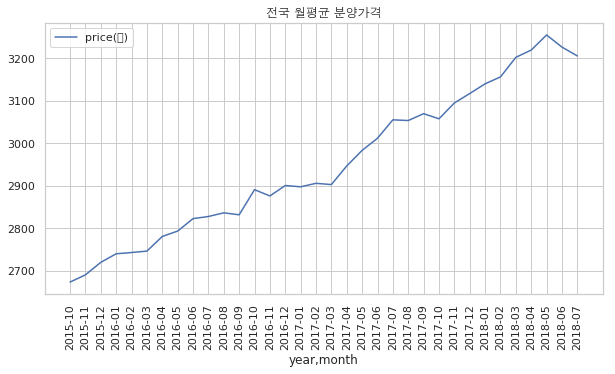

In [13]:
step1_pl = step1_pv.plot(figsize = (10,5))
plt.title('전국 월평균 분양가격', fontproperties=fontprop)
step1_pl.set_xticks(range(len(step1_pv)))
step1_pl.set_xticklabels(["%s-%02d" % item for item in step1_pv.index.tolist()], rotation = 90)
plt.show()

### 분석방법 2.'규모구분' 칼럼 내 '전체' 데이터 중에서 '서울', '경기', '인천', '부산', '세종', '대전'을 제외한 지역의 월별 평균 분양가격 추이 분석

In [8]:
# step 8. 'city' 컬럼에서 '서울', '경기', '인천', '부산', '세종', '대전' 데이터 제거
partial6 = partial_df[~partial_df["city"].isin(["서울","경기","인천",'부산','세종','대전'])]

# step 9. 'size' 컬럼 제거
partial6.drop("size",axis=1,inplace = True)

## step 10. 'year'과 'month' 칼럼을 기준으로 price 칼럼 평균을 출력해주는 groupby 실행, 추가로 index 재설정
result = partial6.groupby([partial6["year"],partial6["month"]]).mean()["price(㎡)"].reset_index()

## step 11. 연산결과 두자리수에서 반올림
result = round(result,2)

## step 12. "increase rate from a month ago(전월대비 분양가 상승률)" 생성
price_list = [result.loc[0]["price(㎡)"]]

def increase_rate(price):   
    price_list_pop = price_list.pop()
    increase_rate = round((price / price_list_pop * 100),2)
    price_list.append(price)
    return increase_rate

result["increase rate from a month ago"] = result["price(㎡)"].apply(increase_rate)

del price_list

## step 13. "increase rate from a month ago" 칼럼 데이터 뒤에 '%' 추가
result["increase rate from a month ago"] = result["increase rate from a month ago"].astype('str')
result["increase rate from a month ago"] = result["increase rate from a month ago"].apply(lambda data : data + " %")

result.head()

,year,month,price(㎡),increase rate from a month ago
0,2015,10,2282.09,100.0 %
1,2015,11,2288.82,100.29 %
2,2015,12,2324.91,101.58 %
3,2016,1,2347.00,100.95 %
4,2016,2,2349.09,100.09 %


In [9]:
result_pv = result.pivot_table('price(㎡)',['year','month'])

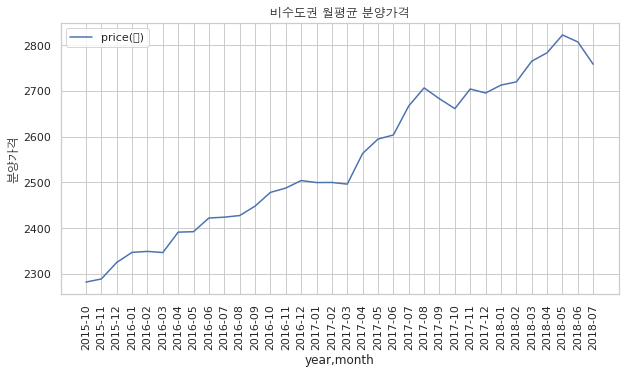

In [23]:
result_pl = result_pv.plot(figsize = (10,5))
plt.title('비수도권 월평균 분양가격', fontproperties=fontprop)
result_pl.set_xticks(range(len(result_pv)))
result_pl.set_xticklabels(["%s-%02d" % item for item in result_pv.index.tolist()], rotation = 90)
result_pl.set_ylabel('분양가격', fontproperties=fontprop)
plt.show()

### 분석방법 3. '규모구분' 칼럼 내 전용면적 별로  월별 평균 분양가격 추이 분석

In [15]:
# step 7. 'size' 칼럼에서 'avg' 데이터만 전시 , index 재설정
partial = total_df[total_df['size'] != 'avg'].reset_index(drop =True)


# step 8. 'size' 컬럼에서 'size' 별로 확인 할 수 있도록 코드작성. 아래와 같이 주석처리하여 선택가능
partial1 = partial[partial['size'] == '~ 60㎡'].reset_index(drop=True)
partial2 = partial[partial['size'] == '60㎡ ~ 85㎡'].reset_index(drop=True)
partial3 = partial[partial['size'] == '85㎡ ~ 102㎡'].reset_index(drop=True)
partial4 = partial[partial['size'] == '102㎡ ~'].reset_index(drop=True)


# step 10. 'year'과 'month' 칼럼을 기준으로 price 칼럼 평균을 출력해주는 groupby 실행, 추가로 index 재설정
result1 = round(partial1.pivot_table('price(㎡)',["year","month"]), 2)
result2 = round(partial2.pivot_table('price(㎡)',["year","month"]), 2)
result3 = round(partial3.pivot_table('price(㎡)',["year","month"]), 2)
result4 = round(partial4.pivot_table('price(㎡)',["year","month"]), 2)


result1.head()
result2.head()
result3.head()
result4.head()

price(㎡)
year month          
2015 10      2918.73
     11      3009.93
     12      3014.27
2016 1       3004.80
     2       2988.20

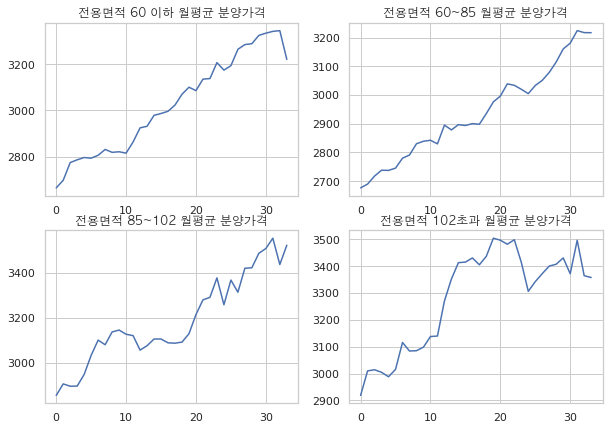

In [18]:
plt.figure(figsize=(10,7))

plt.subplot(2,2,1)
plt.plot(result1.values)
plt.title('전용면적 60 이하 월평균 분양가격', fontproperties=fontprop)

plt.subplot(2,2,2)
plt.plot(result2.values)
plt.title('전용면적 60~85 월평균 분양가격', fontproperties=fontprop)

plt.subplot(2,2,3)
plt.plot(result3.values)
plt.title('전용면적 85~102 월평균 분양가격', fontproperties=fontprop)

plt.subplot(2,2,4)
plt.plot(result4.values)
plt.title('전용면적 102초과 월평균 분양가격', fontproperties=fontprop)

plt.show()

In [19]:
result1.rename(columns = {'price(㎡)':'~60㎡'}, inplace = True)
result2.rename(columns = {'price(㎡)':'60㎡~85㎡'}, inplace = True)
result3.rename(columns = {'price(㎡)':'85㎡~102㎡'}, inplace = True)
result4.rename(columns = {'price(㎡)':'102㎡~'}, inplace = True)

In [20]:
result = result2.combine_first(result1)
result = result3.combine_first(result)
result = result4.combine_first(result)

cols = result.columns.tolist()
cols = [cols[3],cols[1],cols[2],cols[0]]
result = result[cols]
result.head()

~60㎡  60㎡~85㎡  85㎡~102㎡    102㎡~
year month                                     
2015 10     2665.12  2676.35   2853.62  2918.73
     11     2698.06  2689.59   2905.00  3009.93
     12     2774.56  2717.53   2894.56  3014.27
2016 1      2786.44  2737.94   2895.19  3004.80
     2      2796.44  2737.29   2947.27  2988.20

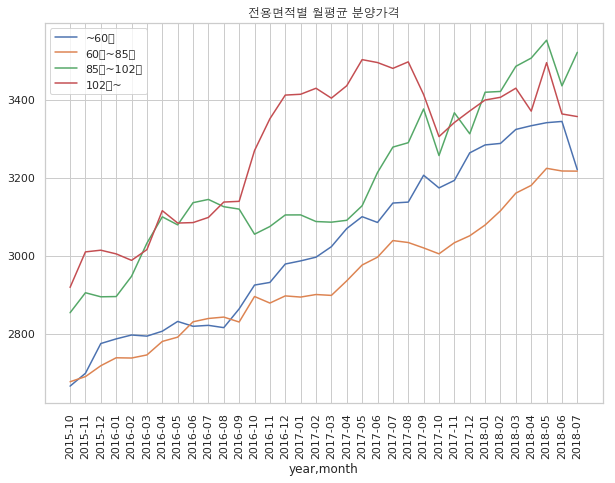

In [22]:
result_pl = result.plot(figsize = (10,7))
plt.title('전용면적별 월평균 분양가격', fontproperties=fontprop)
result_pl.set_xticks(range(len(result)))
result_pl.set_xticklabels(["%s-%02d" % item for item in result.index.tolist()], rotation = 90)

plt.show()

## 결론

월별로 분양가 차이나 특이점이 없었고 수도권 비수도권 구분 없이 분양가는 지속적으로 상승하는 추세로 본 가설과 무방한 결과 도출

## 가설 2) 분석

## 가설설정

1. 가설 :

   - **2016년 9-10월, 2017년 11월~18년 2월에 경북지역의 아파트 분양가격이 하락했을 것이다.**
  

2. 가설근거
  
    ㅇ 지진피해 발생
       - 행정안전부 2016 재해연보(145-147), 2017 재해연보(106-110)
       
    ㅇ 현상인식
       - '16년 9월 경상북도 경주, 17년 11월 경상북도 포항을 중심으로 리히터 규모 5이상의 지진으로 인명 및 재산피해 발생

## 분석방법


1. 지역 칼럼에서 '경북'에 해당하는 데이터만 추출 후, 규모구분 칼럼 내 '전체' 데이터의 월별 분양가격 상승률 계산 및 비교분석


2. 경북 지역 각 전용면적마다의 월별 분양가격 상승률 계산 및 비교분석


3. 전국 모든 시,도의 규모구분 '전체' 데이터 추출 후 월별 분양가격 상승률 계산, 예측한 시기의 경북지역 상승률과 타 지역들의 상승률 비교



## 분석중점


  - 경북 지역에서의 아파트 분양가격 상승률 추이를 월별로 비교하여 다른 시기에 비해 예측한 시기 분양가격이 하락하는지 확인


  - 예측한 시기의 전국 모든 시, 도의 아파트 분양가격 상승률 추이를 비교하여 경북지역의 분양가격이 타지역에 비해 하락했는지 확인
      

## 분석결과 

 - 가설과 정반대로, 지진이 발생한 시기에 경북 지역의 아파트 분양가격은 오히려 상승하는 경향을 보임

## 분석과정

In [25]:
df = pd.read_csv("apt_2018_7.csv", encoding='euc-kr')
df.rename(columns = {"지역명":"city","규모구분":"size","연도":"year","월":"month","분양가격(㎡)":"price(㎡)"}, inplace = True)
df.replace(('전용면적 102㎡초과','전용면적 85㎡초과 102㎡이하','전용면적 60㎡초과 85㎡이하','전용면적 60㎡이하','전체'),\
           ('102㎡ ~','85㎡ ~ 102㎡', '60㎡ ~ 85㎡','~ 60㎡','avg'), inplace = True)
df.head()

,city,size,year,month,price(㎡)
0,서울,avg,2015,10,5841
1,서울,~ 60㎡,2015,10,5652
2,서울,60㎡ ~ 85㎡,2015,10,5882
3,서울,85㎡ ~ 102㎡,2015,10,5721
4,서울,102㎡ ~,2015,10,5879


In [26]:
# 분양가격 column에서 공백, 즉 가격데이터가 없는 값들을 nan으로 바꿔주고, nan값인 행들을 제거합니다.
df["price(㎡)"].replace('  ', np.nan, inplace = True)
df.dropna(inplace = True)

# 가격 내 쉼표를 제거합니다.
df["price(㎡)"] = df["price(㎡)"].apply(lambda x: x.replace(',',''))

# str이었던 가격을 int로 바꿔줍니다.
df['price(㎡)'] = df['price(㎡)'].astype('int')

# index를 reset해줍니다.
df.reset_index(drop = True, inplace = True)
df.tail()

,city,size,year,month,price(㎡)
2729,경남,102㎡ ~,2018,7,2839
2730,제주,avg,2018,7,3334
2731,제주,60㎡ ~ 85㎡,2018,7,3356
2732,제주,85㎡ ~ 102㎡,2018,7,3226
2733,제주,102㎡ ~,2018,7,2990


In [27]:
# rise = [np.nan]
# def rising_price(price):
#     for index in range(len(price)-1):
#         a = round(list(price)[index+1] / list(price)[index] * 100, 2)
#         rise.append(a)
#     return rise
# list(df_kb_all['price(㎡)'])[0] / list(df_kb_all['price(㎡)'])[1] * 100  


# 처음에 이렇게 함수를 선언해서 상승률을 계산했는데 pandas 내부 기능으로 lambda를 사용해 apply하는 방법으로 수정,개선하였습니다.

#### 분석 1. 경북지역 아파트 '전체' 월별 분양가격 상승률 계산 및 비교분석

In [28]:
# 경북지역 중 size가 전체인 것들끼리 분양가격을 비교하기 위해 새 dataframe을 만듭니다.
df_kb_all = df[df['city'] == '경북']
df_kb_all = df_kb_all[df_kb_all['size'] == 'avg']
df_kb_all.reset_index(drop=True, inplace=True)


# 아래 lambda 함수에서 상승률을 계산하기 위해 index값을 밸류값으로 하는 column을 생성합니다.
df_kb_all['index'] =list(range(len(df_kb_all)))


# lambda함수로 상승률을 계산해 apply함수를 이용하여 'rate_of_rise'라는 새로운 칼럼에 넣어줍니다.
df_kb_all['rate_of_rise'] = df_kb_all['index'].apply(lambda x : np.nan if x == 0 \
                                                     else round(df_kb_all['price(㎡)'][x] / df_kb_all['price(㎡)'][x-1] * 100, 2))


# 오로지 상승률 계산을 위해 만들었던 index칼럼을 드랍합니다. 
df_kb_all.drop(columns = 'index', inplace = True)


# pivot으로 연도별, 월별로 보기 좋게 정리합니다.
# df_kb_all = df_kb_all.pivot("month", "year", "rate_of_rise")
# df_kb_all

In [29]:
df_kb_all

,city,size,year,month,price(㎡),rate_of_rise
0,경북,avg,2015,10,2148,NaN
1,경북,avg,2015,11,2190,101.96
2,경북,avg,2015,12,2181,99.59
3,경북,avg,2016,1,2181,100.00
4,경북,avg,2016,2,2179,99.91
5,경북,avg,2016,3,2179,100.00
6,경북,avg,2016,4,2177,99.91
7,경북,avg,2016,5,2176,99.95
8,경북,avg,2016,6,2238,102.85
9,경북,avg,2016,7,2248,100.45


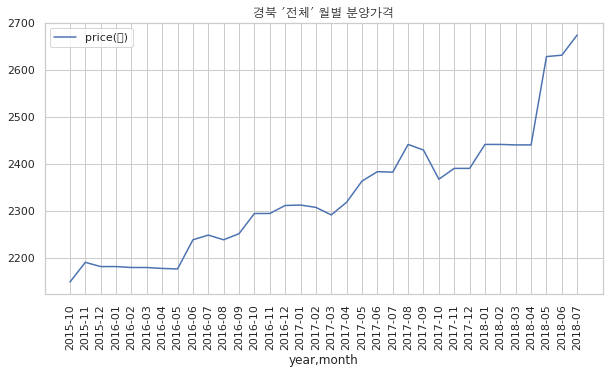

In [32]:
df_pt = df_kb_all.pivot_table("price(㎡)",["year","month"])
df_pl = df_pt.plot(figsize = (10,5))

df_pl.set_xticks(range(len(df_pt)))
df_pl.set_xticklabels(["%s-%02d" % item for item in df_pt.index.tolist()], rotation=90)

plt.title('경북 \'전체\' 월별 분양가격', fontproperties=fontprop)

plt.show()

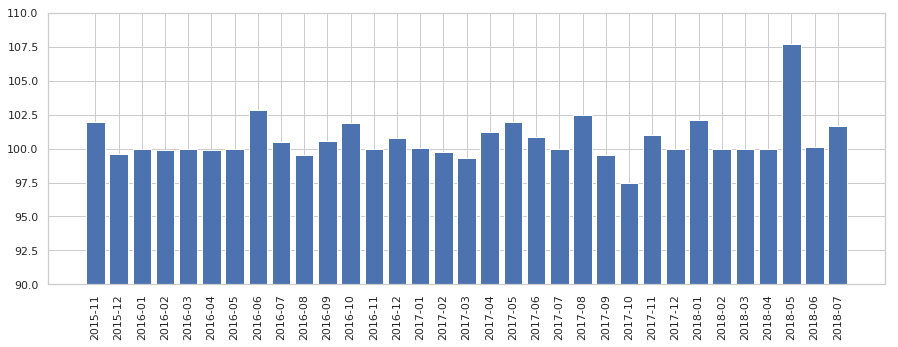

In [34]:
df_pt2 = df_kb_all.pivot_table("rate_of_rise",["year",'month'])
df_pt2
plt.figure(figsize=(15,5))
plt.bar(["%s-%02d" % item for item in df_pt2.index.tolist()], df_pt2['rate_of_rise'])

plt.xticks(rotation=90)

plt.ylim(90,110)
plt.show()

- 분석 1의 결과
>예측했던 것과는 정반대로, 
2016년 9월에서 10월, 2017년 11월에서 2018년 2월까지 분양가격이 오히려 상승했거나 변동이 없었음을 확인할 수 있습니다.